In [25]:
#LIBRERIAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import rcParams
sns.set_theme ( style = 'darkgrid')


In [26]:
#LEEMOS EL CSV
df = pd.read_csv('/content/Electric_Production.csv')
df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [27]:
#CAMBIAMOS EL NOMBRE DE LA COLUMNA
df2 = df.rename(columns = {'IPG2211A2N' : 'VALUES'})
df2

,DATE,VALUES
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [28]:
df2.head()

,DATE,VALUES
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [29]:
df2.tail()

,DATE,VALUES
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212
396,1/1/2018,129.4048


In [30]:
df2.describe()

,VALUES
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [31]:
df2.dtypes

DATE       object
VALUES    float64
dtype: object

In [32]:
#VALORES UNICOS
df2.index.is_unique

True

In [33]:
#CONVERSION A DATETIME
df2.DATE = pd.to_datetime(df2.DATE)

df2['DATE'].head()

0   1985-01-01
1   1985-02-01
2   1985-03-01
3   1985-04-01
4   1985-05-01
Name: DATE, dtype: datetime64[ns]

In [34]:
df2 = df2.set_index('DATE')

df2.head()

,VALUES
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


**FRECUENCIA**
---



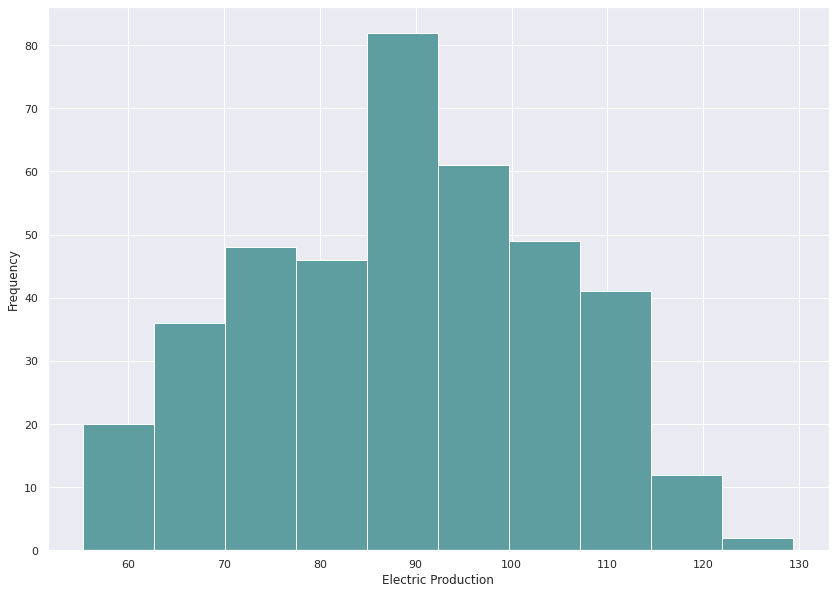

In [35]:
plt.figure(figsize = (14,10))
plt.hist(df2['VALUES'], color = '#5F9EA0')
plt.xlabel('Electric Production', size = 12)
plt.ylabel('Frequency', size = 12)
plt.show()

**TIME SERIES PLOT**
---







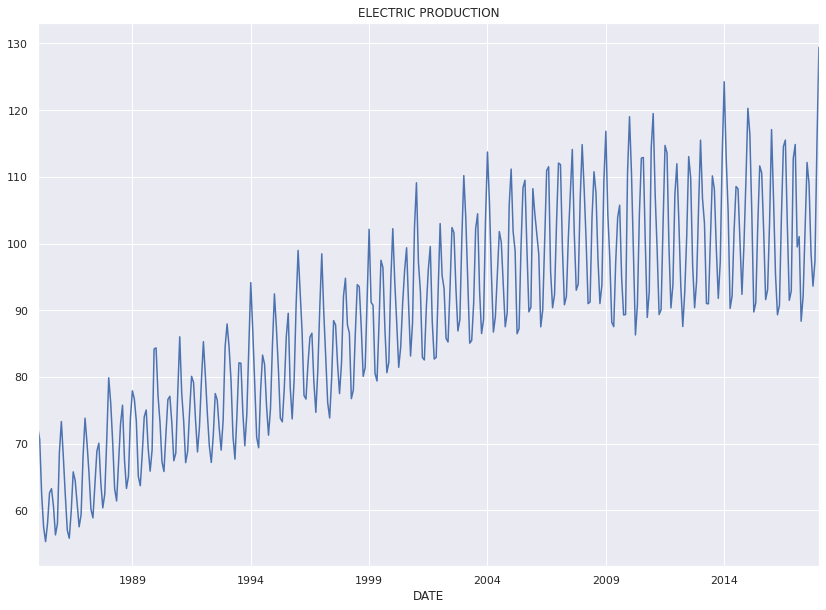

In [36]:
df2_plot = df2['VALUES'].plot(title = 'ELECTRIC PRODUCTION')

fig = df2_plot.get_figure()
fig.set_size_inches(14, 10)

¿CÓMO FUE EL CRECIMIENTO EN LOS PRIMEROS 5 AÑOS?

---



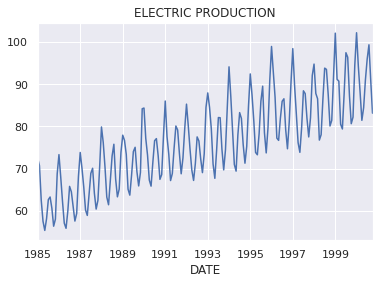

In [37]:
df3 = df2.head(190)

df3_plot = df3['VALUES'].plot(title = 'ELECTRIC PRODUCTION')

fig = df2_plot.get_figure()
fig.set_size_inches(14, 10)

¿CÓMO FUE EL CRECIMIENTO EN LOS ULTIMOS 5 AÑOS?

---



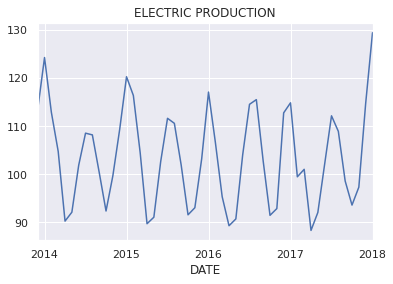

In [38]:
df3 = df2.tail(50)

df3_plot = df3['VALUES'].plot(title = 'ELECTRIC PRODUCTION')

fig = df2_plot.get_figure()
fig.set_size_inches(14, 10)

**DECOMPOSE**
---



<Figure size 432x288 with 0 Axes>

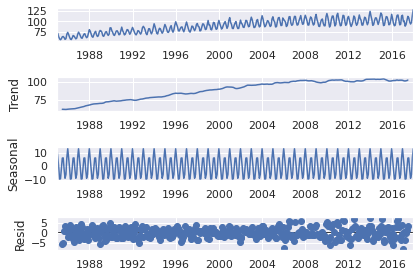

In [39]:
result = seasonal_decompose(df2)

fig = plt.figure()  
fig = result.plot()

**¿COMO FUE EL CRECIMIENTO ANUAL?**

---



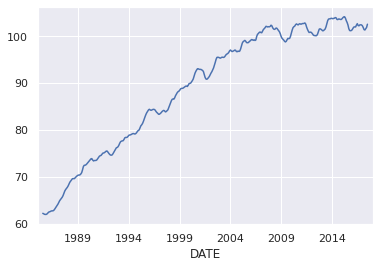

In [40]:
result.trend.plot()


**BIVARIATE DISTRIBUTIONS**
---


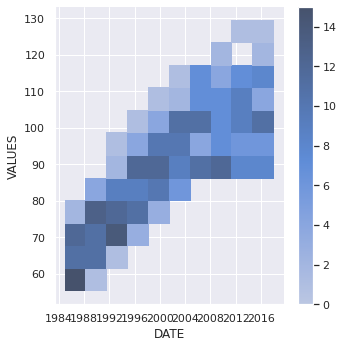

In [41]:
sns.displot(df2, x ='DATE', y ='VALUES', cbar = True)

**MIXED VIZUALITATION**
---



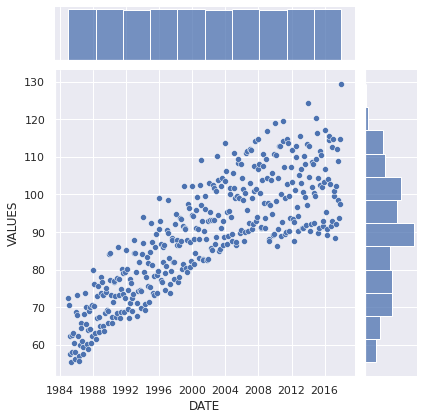

In [42]:
sns.jointplot(data=df2, x="DATE", y="VALUES")

World Wide Unicord Startups
---



In [43]:
data = pd.read_csv('/content/World_Wide_Unicorn_Startups.csv')
data

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1
...,...,...,...,...,...,...,...,...,...,...
931,YipitData,1.0,12/6/2021,United States,New York,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2021,6,12
932,Anyscale,1.0,12/7/2021,United States,Berkeley,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2021,7,12
933,Iodine Software,1.0,12/1/2021,United States,Austin,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2021,1,12
934,ReliaQuest,1.0,12/1/2021,United States,Tampa,Cybersecurity,"0 Sequoia Capital China, SIG Asia Investm...",2021,1,12


In [44]:
data.Date = pd.to_datetime(data.Date)

data['Date'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Date, dtype: datetime64[ns]

In [45]:
data.dtypes

Company              object
Valuation           float64
Date         datetime64[ns]
Country              object
City                 object
Industry             object
Investors            object
year                  int64
month                 int64
day                   int64
dtype: object

In [46]:
!pip install plotly -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 65.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [47]:
import plotly.express as px 
fig = px.scatter(data, x="Company", y = 'Valuation' , color='Industry', size = 'Valuation')
fig.show()

In [48]:
fig = px.pie(data, names='Industry', title='Clasificación por Industria')
fig.show()

In [49]:
y_count = data.groupby('year').count()
df_y_count = y_count.reset_index()
px.bar(x = 'year', y = 'Company' ,data_frame = df_y_count)

In [50]:
c_count = data.groupby('Country').count()
df_c_count = c_count.reset_index()
px.bar(x = 'Country', y = 'Company' ,data_frame = df_c_count)

In [51]:
val = data.sort_values('Valuation', ascending=False).head(20)
com_val = px.line(x = 'Company', y = 'Valuation', data_frame= val)
com_val
